#**INTRODUCTION**

"Unlocking Financial Insights: A Comprehensive Data Analysis of Credit Information for Evaluating Applicant Creditworthiness"

In today's rapidly evolving financial landscape, accurate and robust credit assessment is paramount for informed lending decisions. This data-driven analysis delves into the intricate web of credit data to uncover patterns, trends, and key indicators that contribute to determining the creditworthiness of applicants.

* Not approving a loan to an applicant having a good credit risk is a loss of business to the bank.
* Approving a loan to an applicant having a bad credit risk is also a loss of business to the bank.

Hence, banks have to be very careful while accepting or rejecting a loan application

#**OBJECTIVE**

The main objective of this assignment is to minimize the risk and maximize the profit of the bank. Bank has to make a decision based on the applicant’s profile to minimize the loss from the bank's perspective.

| Variables | Value |
| --- | --- |
| Age | numeric|
|Sex|text: male, female|
|Job|numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled|
|Housing|text: own, rent, or free|
|Saving accounts|text - little, moderate, quite rich, rich|
|Checking account|text - little, moderate, rich|
|Credit amount|numeric, in Deutsche Mark|
|Duration|numeric, in month|
|Purpose|text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others|

#**EDA + Data Cleaning**

In [1]:
# Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import missingno as msno

In [2]:
#Reading the german_Credit dataset
data = pd.read_excel("german_Credit.xlsx")

# taking a view of top 5 rows
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


* NaN indicates there are some missing values in the dataset.
* Column "unnamed: 0" looks like a dummy column very similar to the index.

In [3]:
# Dropping irrelavant column
data.drop('Unnamed: 0', axis=1, inplace = True)

In [4]:
# Checking shape of the dataset
data.shape

(1000, 9)

* There are 9 columns and 1000 rows in the dataset.

In [5]:
# summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


* We have 4 numerical and 5 categorical features.
* Column 'Saving accounts' and 'Checking account' have null values.
* Column 'Job' has categorical values but coded as int64.

In [6]:
# Count of unique values of features
data.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
dtype: int64

In [7]:
# Converting column 'Job' dtype to category
data['Job'] = data['Job'].astype('category')

In [8]:
# printing unique values of categorical columns
for i in data.select_dtypes(include =['object','category']).columns:
  print(f"{i} : {data[i].unique()}\n")

Sex : ['male' 'female']

Job : [2, 1, 3, 0]
Categories (4, int64): [0, 1, 2, 3]

Housing : ['own' 'free' 'rent']

Saving accounts : [nan 'little' 'quite rich' 'rich' 'moderate']

Checking account : ['little' 'moderate' nan 'rich']

Purpose : ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']



In [9]:
# Basic statistics of the dataset features
data.describe(include='all')

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
count,1000.000000,1000,1000.0,1000,817,606,1000.000000,1000.000000,1000
unique,NaN,2,4.0,3,4,3,NaN,NaN,8
top,NaN,male,2.0,own,little,little,NaN,NaN,car
freq,NaN,690,630.0,713,603,274,NaN,NaN,337
mean,35.546000,NaN,NaN,NaN,NaN,NaN,3271.258000,20.903000,NaN
std,11.375469,NaN,NaN,NaN,NaN,NaN,2822.736876,12.058814,NaN
min,19.000000,NaN,NaN,NaN,NaN,NaN,250.000000,4.000000,NaN
25%,27.000000,NaN,NaN,NaN,NaN,NaN,1365.500000,12.000000,NaN
50%,33.000000,NaN,NaN,NaN,NaN,NaN,2319.500000,18.000000,NaN
75%,42.000000,NaN,NaN,NaN,NaN,NaN,3972.250000,24.000000,NaN


* Age column ranges from 19 to 75.
* Average age of applicants is 35.
* Average amount borrowed is 3271.

In [10]:
# Checking how many null values in each column
data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

* Column 'Saving accounts' has 183 null values.
* Column 'Checking account' has 394 null values.

#DATA VISUALIZATION

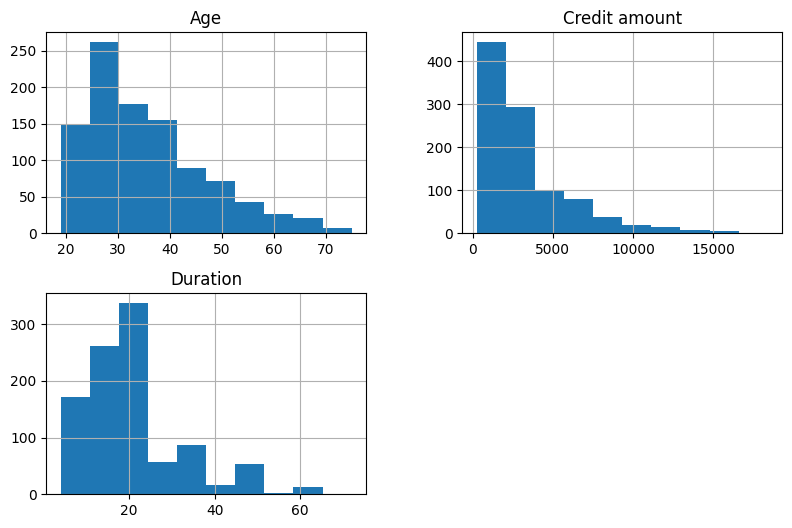

In [11]:
# Plotting histogram
data.hist(figsize = (9.5,6))
plt.show()

##**CONTINUOUS VARIABLE DISTRIBUTION**

In [12]:
# Plotting age column for visualizing distribution.
fig1 = px.histogram(data,x = 'Age',width=800, height=400, title= 'Age distribution')
fig2 = px.box(data, x = 'Age', width = 800, height= 400, title = 'Boxplot for Age distribution')

fig1.show()
fig2.show()

* Maximum number of applicants were of age between 25-30.
* Age column is right skewed.

In [13]:
# Plotting Credit amount
fig1 = px.histogram(data,x = 'Credit amount',width=800, height=400, title= 'Credit amount distribution')
fig2 = px.box(data, x = 'Credit amount', width = 800, height= 400, title = 'Boxplot for Credit amount distribution')

fig1.show()
fig2.show()

* Maximum number of applicants borrowed Credit amount between 1000-1499.
* Credit amount column is exponentially decreasing.
* Data is right skewed.

In [14]:
# Plotting duration
fig1 = px.histogram(data,x = 'Duration',width=800, height=400, title= 'Duration distribution')
fig2 = px.box(data, x = 'Duration', width = 800, height= 400, title = 'Boxplot for Duration distribution')

fig1.show()
fig2.show()

* Maximum number of credits were for a duration of 1-2 years.
* Data is right skewed.
* Outliers in the right side of the data.


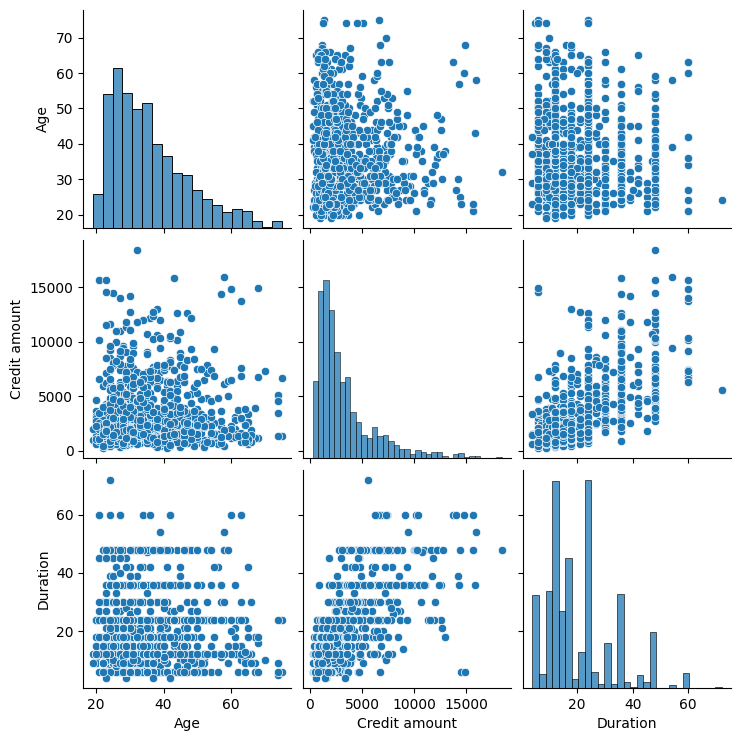

In [15]:
# Plotting a pairplot for all the features
sns.pairplot(data)
plt.show()

* As no feature is related linearly.
* Hence we go for Correlation check using Spearman rank correlation.
* Spearman is good at satisfying the non-linear properties.

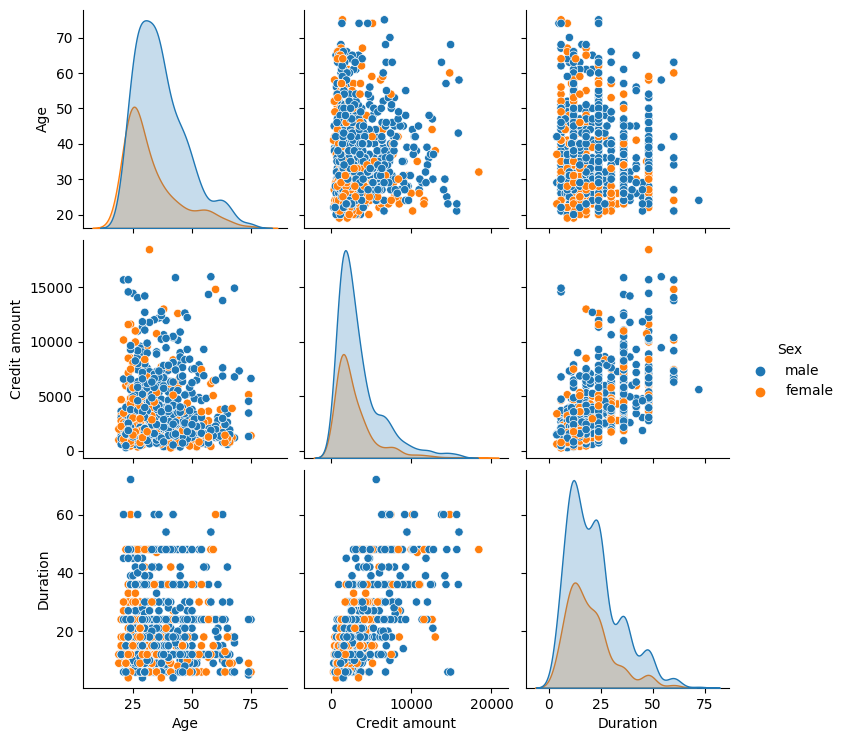

In [16]:
sns.pairplot(data, hue = 'Sex')

* Density plot of all continuous feature shows high peak in males.
* This means more number of male applicants.

<ipython-input-17-7a5f91c5dece>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

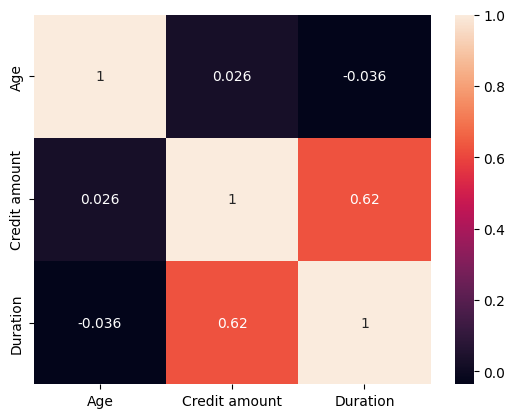

In [17]:
# Correlation and heatmap of numerical columns.
corr_matrix = data.corr(method='spearman')
sns.heatmap(corr_matrix, annot =True)

* Credit amount and Duration has positive correlation of 62%.

In [18]:
data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

##**CATEGORICAL VARIABLES COUNTPLOTS**

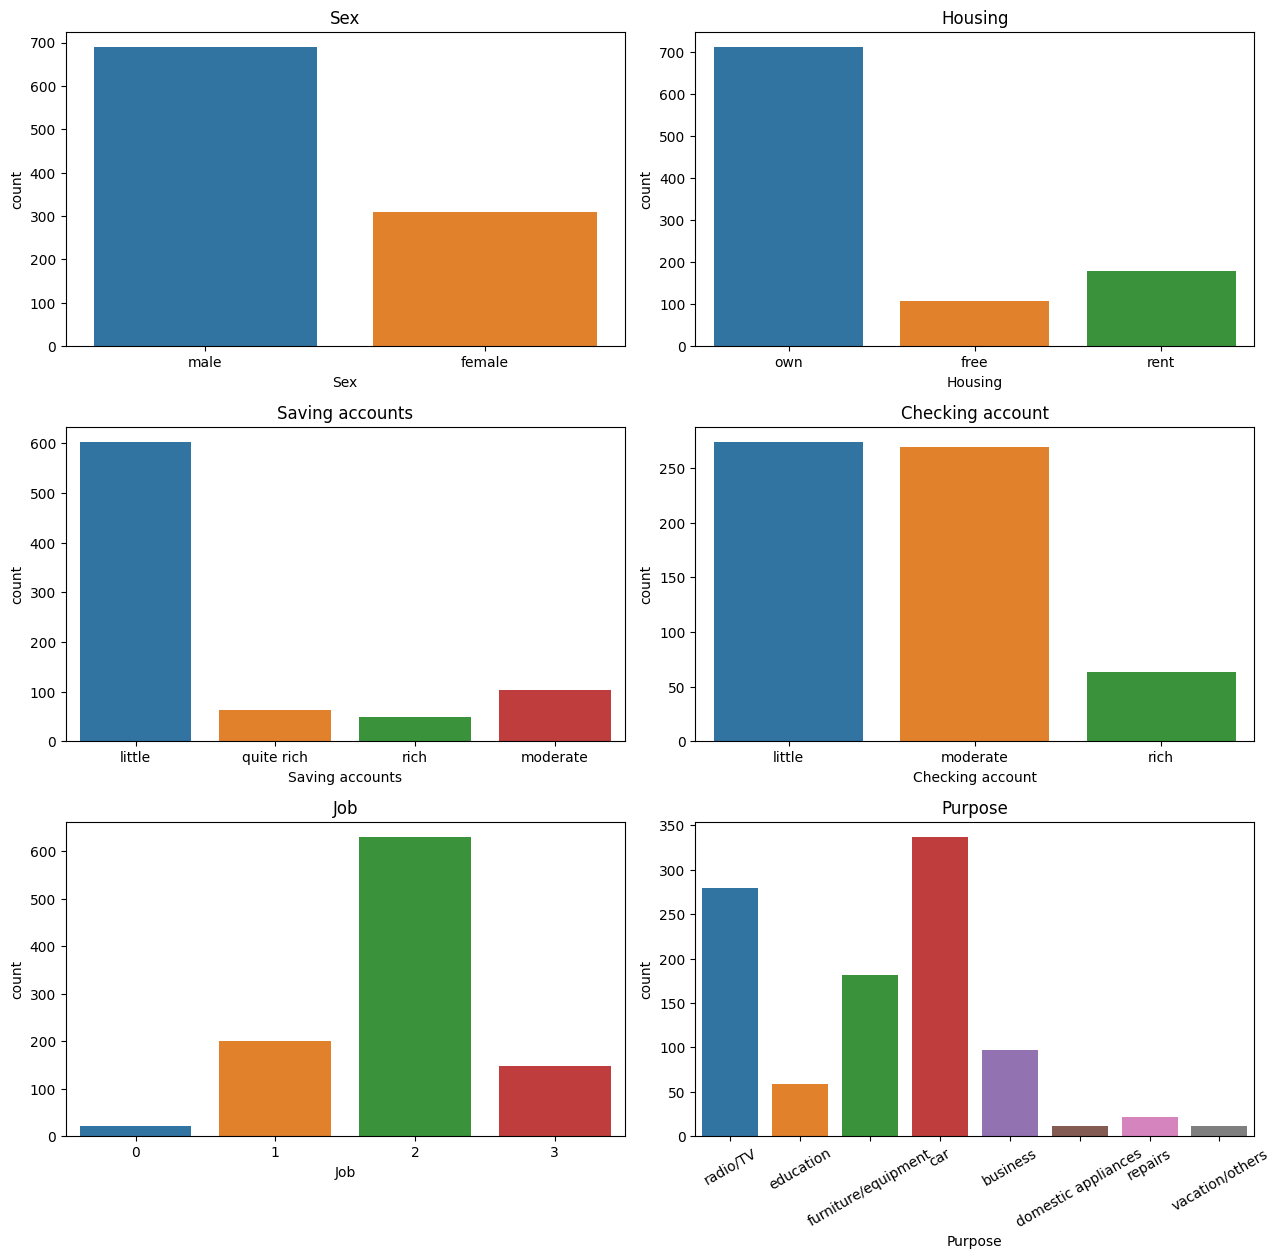

In [19]:
# Create the subplots
fig, axes = plt.subplots(3, 2, figsize = (13,12))

# Set subplot titles
titles = ["Sex", "Housing", "Saving accounts", "Checking account", 'Job', "Purpose"]

# Create count plots for each subplot
for ax, title in zip(axes.flatten(), titles):
    sns.countplot(x=data[title], ax=ax)
    ax.set_title(title)

# Adjust spacing between subplots
plt.tight_layout()
plt.xticks(rotation=30)

# Show the figure
plt.show()

* We can say that more number of male applicants as compared to female.
* More number of applicants have their own house.
* More number of applicants having little saving accounts.
* More number of applicants having little or moderate checking account.
* More number of middle class people applied for credit.
* Maximum applications were for car, tv and furniture.

##**CATEGORICAL VARIABLES COUNTPLOTS by Gender**

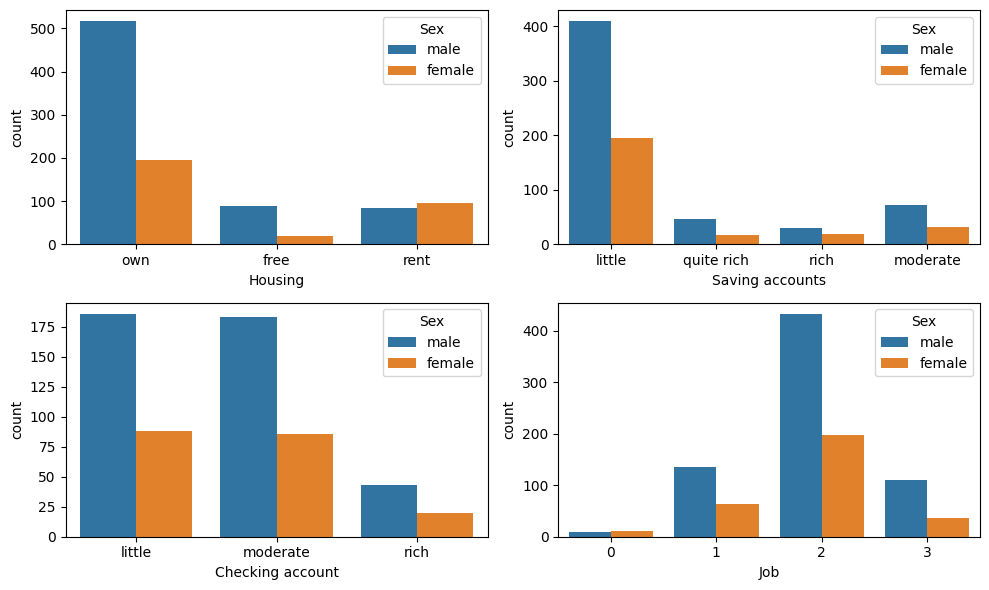

In [20]:
# Countplots for all the categorical variables by gender.
fig, axes = plt.subplots(2, 2, figsize = (10,6))

sns.countplot(data, x = 'Housing', hue = 'Sex', ax= axes[0,0])
sns.countplot(data, x = 'Saving accounts', hue = 'Sex', ax= axes[0,1])
sns.countplot(data, x = 'Checking account', hue = 'Sex', ax= axes[1,0])
sns.countplot(data, x = 'Job', hue = 'Sex', ax= axes[1,1])

plt.tight_layout()
plt.show()



* More number of skilled males who live in their own house having little Saving and Checking accounts

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'radio/TV'),
  Text(1, 0, 'education'),
  Text(2, 0, 'furniture/equipment'),
  Text(3, 0, 'car'),
  Text(4, 0, 'business'),
  Text(5, 0, 'domestic appliances'),
  Text(6, 0, 'repairs'),
  Text(7, 0, 'vacation/others')])

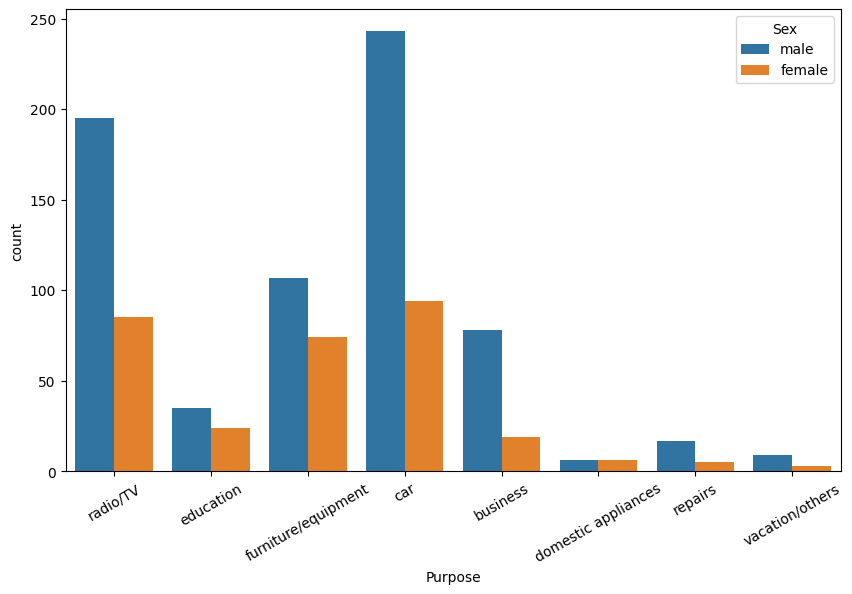

In [21]:
# Plotting application reasons for loan by gender.
plt.figure(figsize= (10,6))
sns.countplot(data, x= 'Purpose', hue = 'Sex')
plt.xticks(rotation=30)

* Men took loan for car and tv while female for furniture and education.

##**CATEGORICAL VARIABLES COUNTPLOTS by JOB**

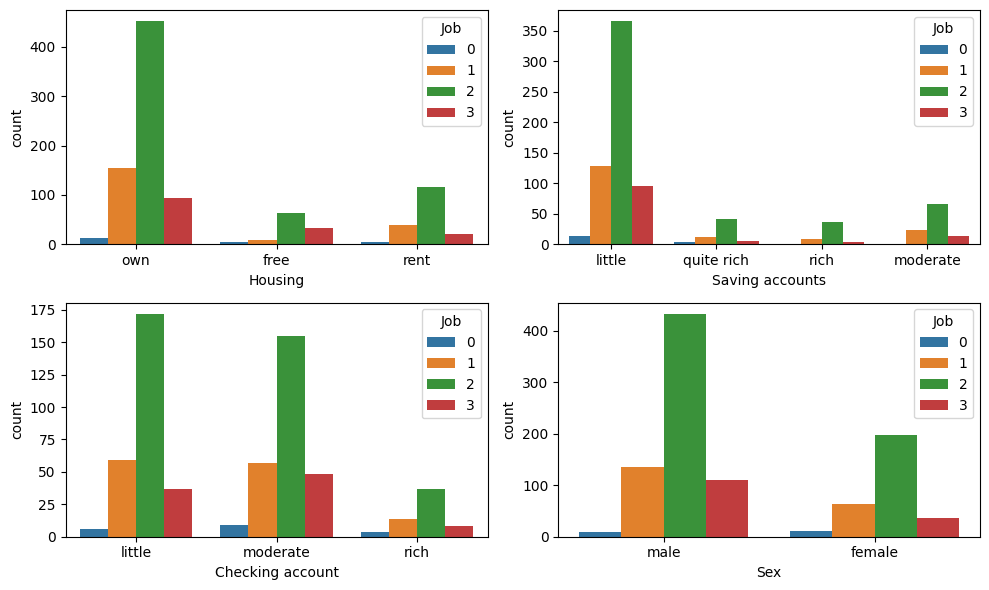

In [22]:
# Plotting all the categorical variables by Job.
fig, axes = plt.subplots(2, 2, figsize = (10,6))

sns.countplot(data, x = 'Housing', hue = 'Job', ax= axes[0,0])
sns.countplot(data, x = 'Saving accounts', hue = 'Job', ax= axes[0,1])
sns.countplot(data, x = 'Checking account', hue = 'Job', ax= axes[1,0])
sns.countplot(data, x = 'Sex', hue = 'Job', ax= axes[1,1])

plt.tight_layout()
plt.show()

* As from the above graph, count of skilled Persons application is much greater than all other.

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'radio/TV'),
  Text(1, 0, 'education'),
  Text(2, 0, 'furniture/equipment'),
  Text(3, 0, 'car'),
  Text(4, 0, 'business'),
  Text(5, 0, 'domestic appliances'),
  Text(6, 0, 'repairs'),
  Text(7, 0, 'vacation/others')])

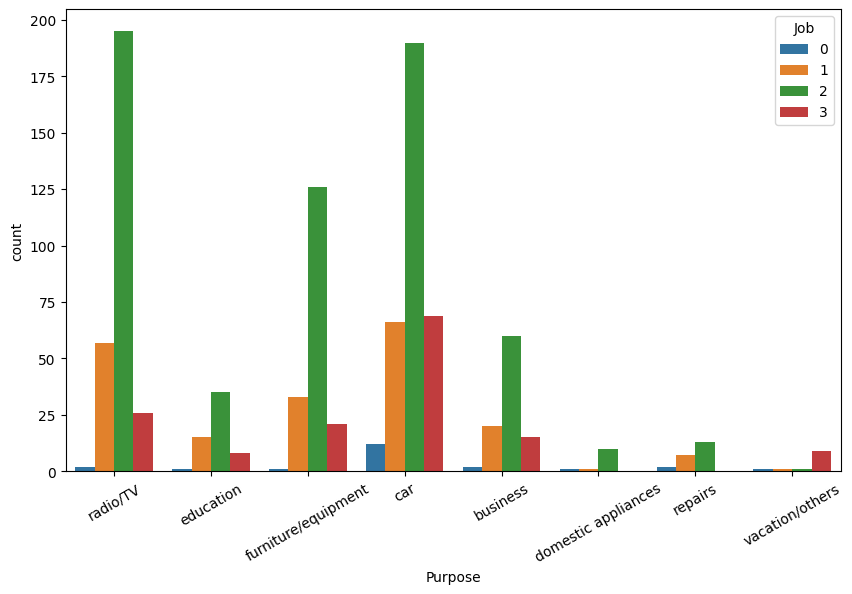

In [23]:
# Plotting reason for applications by Applicants job.
plt.figure(figsize= (10,6))
sns.countplot(data, x= 'Purpose', hue = 'Job')
plt.xticks(rotation=30)

* More number of highly skilled Persons applied for vacation loan.

##**BIVARIATE ANALYSIS**

In [24]:
# Plotting scatter plot - Credit amount vs age
fig = px.scatter(data, x = 'Credit amount', y='Age',color = 'Sex', width=800, height=400)
fig.show()

* No trend seen. They are not linearly related.

In [25]:
# Plot Credit amount vs duration
fig = px.scatter(data, x = 'Duration', y = 'Credit amount', trendline = 'ols', width=800, height=400)
fig.show()

* We see a positive trend between amount and duration.

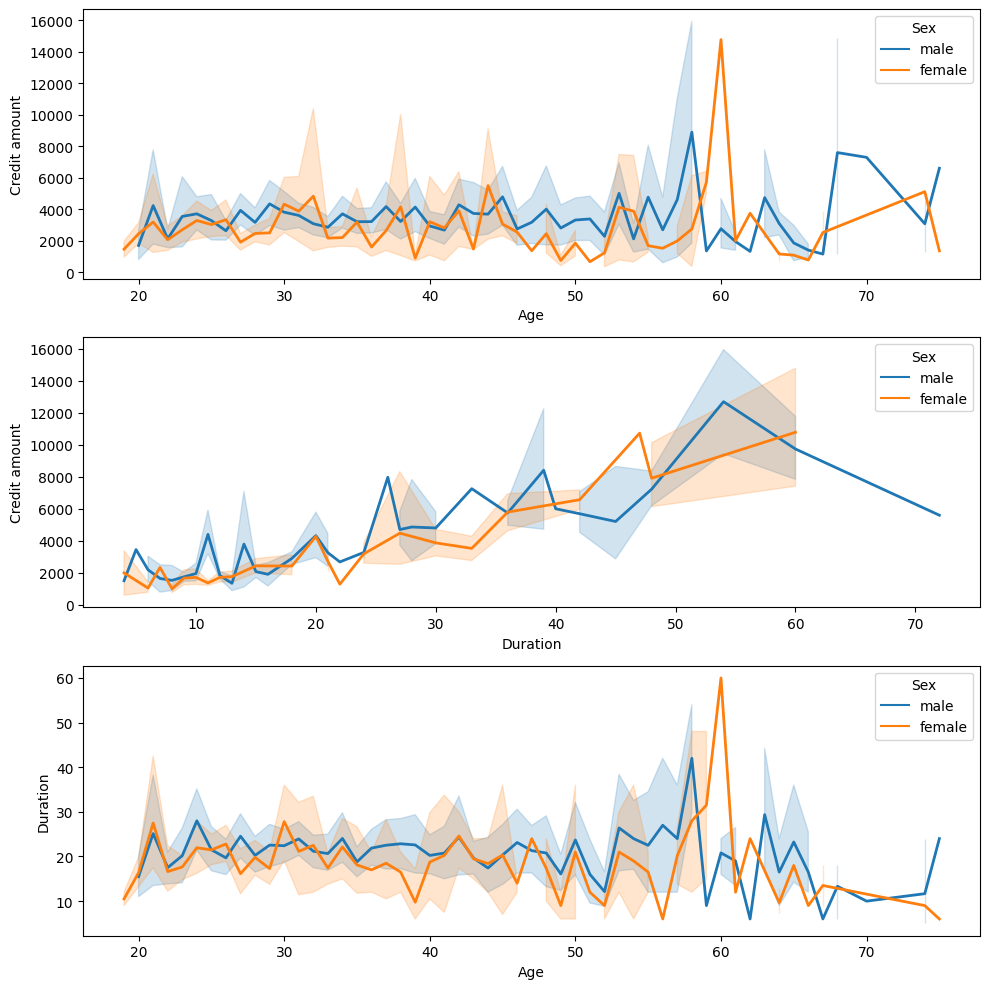

In [26]:
#Plotting a lineplot between Credit amount and all other continuous variable.
fig, ax = plt.subplots(3,1,figsize=(10,10))

sns.lineplot(data=data, x='Age', y='Credit amount', hue='Sex', lw=2, ax=ax[0]);
sns.lineplot(data=data, x='Duration', y='Credit amount', hue='Sex', lw=2, ax=ax[1]);
sns.lineplot(data=data, x='Age', y='Duration', hue='Sex', lw=2, ax=ax[2]);
plt.tight_layout()

In [27]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [28]:
# Plotting Credit amount vs sex
px.box(data, x='Sex', y='Credit amount', notched=True, width=1000, height=600)

* Males applicants applied for high credit amount.

In [29]:
# Credit amount distribution by purpose.
px.box(data, x='Purpose', y='Credit amount',color = 'Sex', notched=True, width=1000, height=600)

* Females took large amount of loan for vacation than males.

In [30]:
# Credit amount distribution genderwise by housing
px.box(data, x ='Housing', y = 'Credit amount', color = 'Sex', notched=True, width=1000, height=600)

* Applicants who live free have taken larger credit amount.

In [31]:
# Credit amount distribution genderwise by JOB
px.box(data, x ='Job', y = 'Credit amount', color = 'Sex', notched=True, width=1000, height=600)

* Highly skilled men and women took large amount of loan.

In [32]:
# Credit amount vs saving accounts (genderwise)
px.box(data, y='Credit amount', x='Saving accounts', color = 'Sex', notched=True, width=1000, height=600)

In [33]:
# Age distribution by sex
px.box(data, y='Age', x='Sex', notched=True, width=1000, height=600)

* Male applicants are of higher age than female.
* Most women applied for loan were of age between 20-30.

In [34]:
# Age distribution genderwise by Job
px.box(data, y='Age', x='Job', color = 'Sex', notched=True, width=1000, height=600)

* Highly skilled women who took loan were of higher age.
* More number of aged employed males took loan.

In [35]:
# Age distribution genderwise by reasons for application.
px.box(data, y='Age', x='Purpose', color = 'Sex', notched=True, width=1000, height=600)


* Females were more likely to apply for a credit loan tobuy furniture and equipment. (10% more than males)

In [36]:
# Age distribution vs housing (genderwise)
px.box(data, x='Housing', y='Age',color = 'Sex', notched=True, width=1000, height=600)

In [37]:
# Duration vs Job (genderwise)
px.box(data, x='Job', y='Duration',color = 'Sex', notched=True, width=1000, height=600)

* Highly skilled men and women took loan for longer duration.

#**ANALYZING MISSING VALUES**

In [38]:
# Again checking for null values column wise
data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [39]:
# Checking most frequent Saving accounts
data['Saving accounts'].mode()

0    little
Name: Saving accounts, dtype: object

In [40]:
# Checking most frequent Checking account
data['Checking account'].mode()

0    little
Name: Checking account, dtype: object

<Axes: >

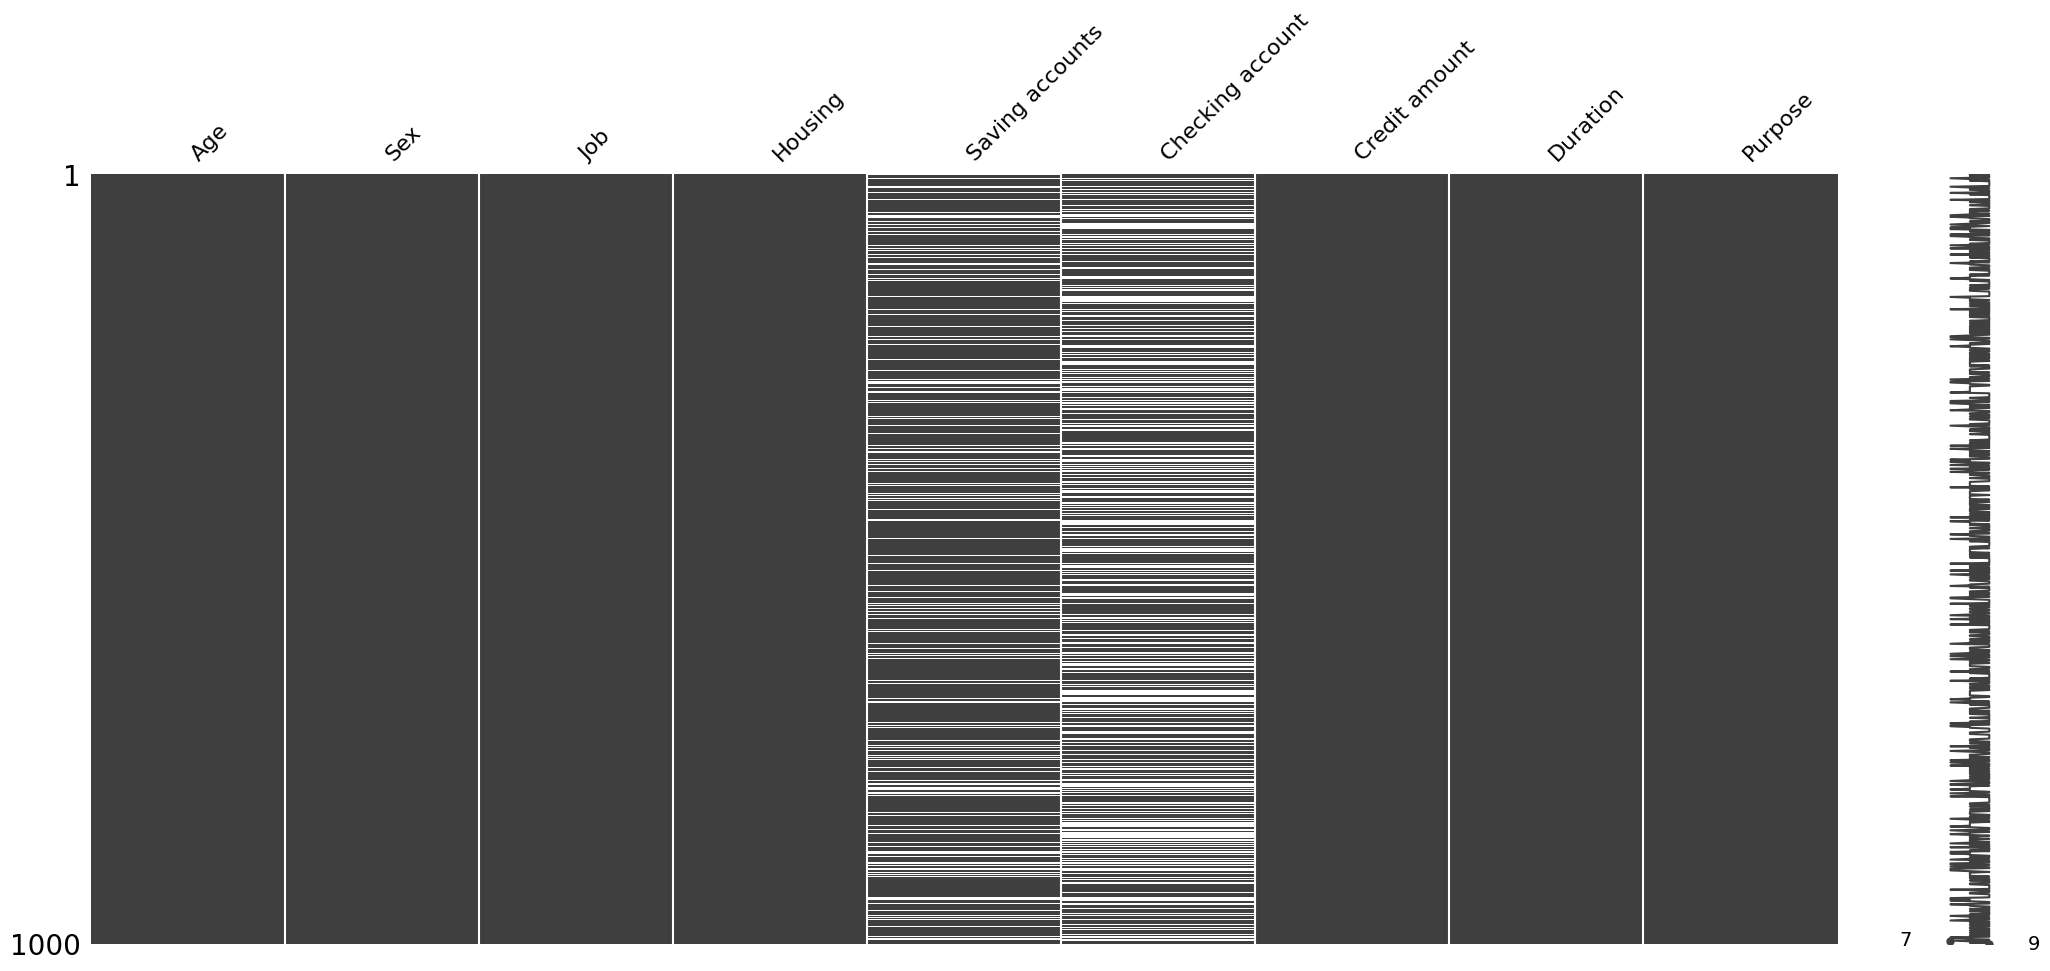

In [41]:
# Visualization of null values through matrix
msno.matrix(data)

<Axes: >

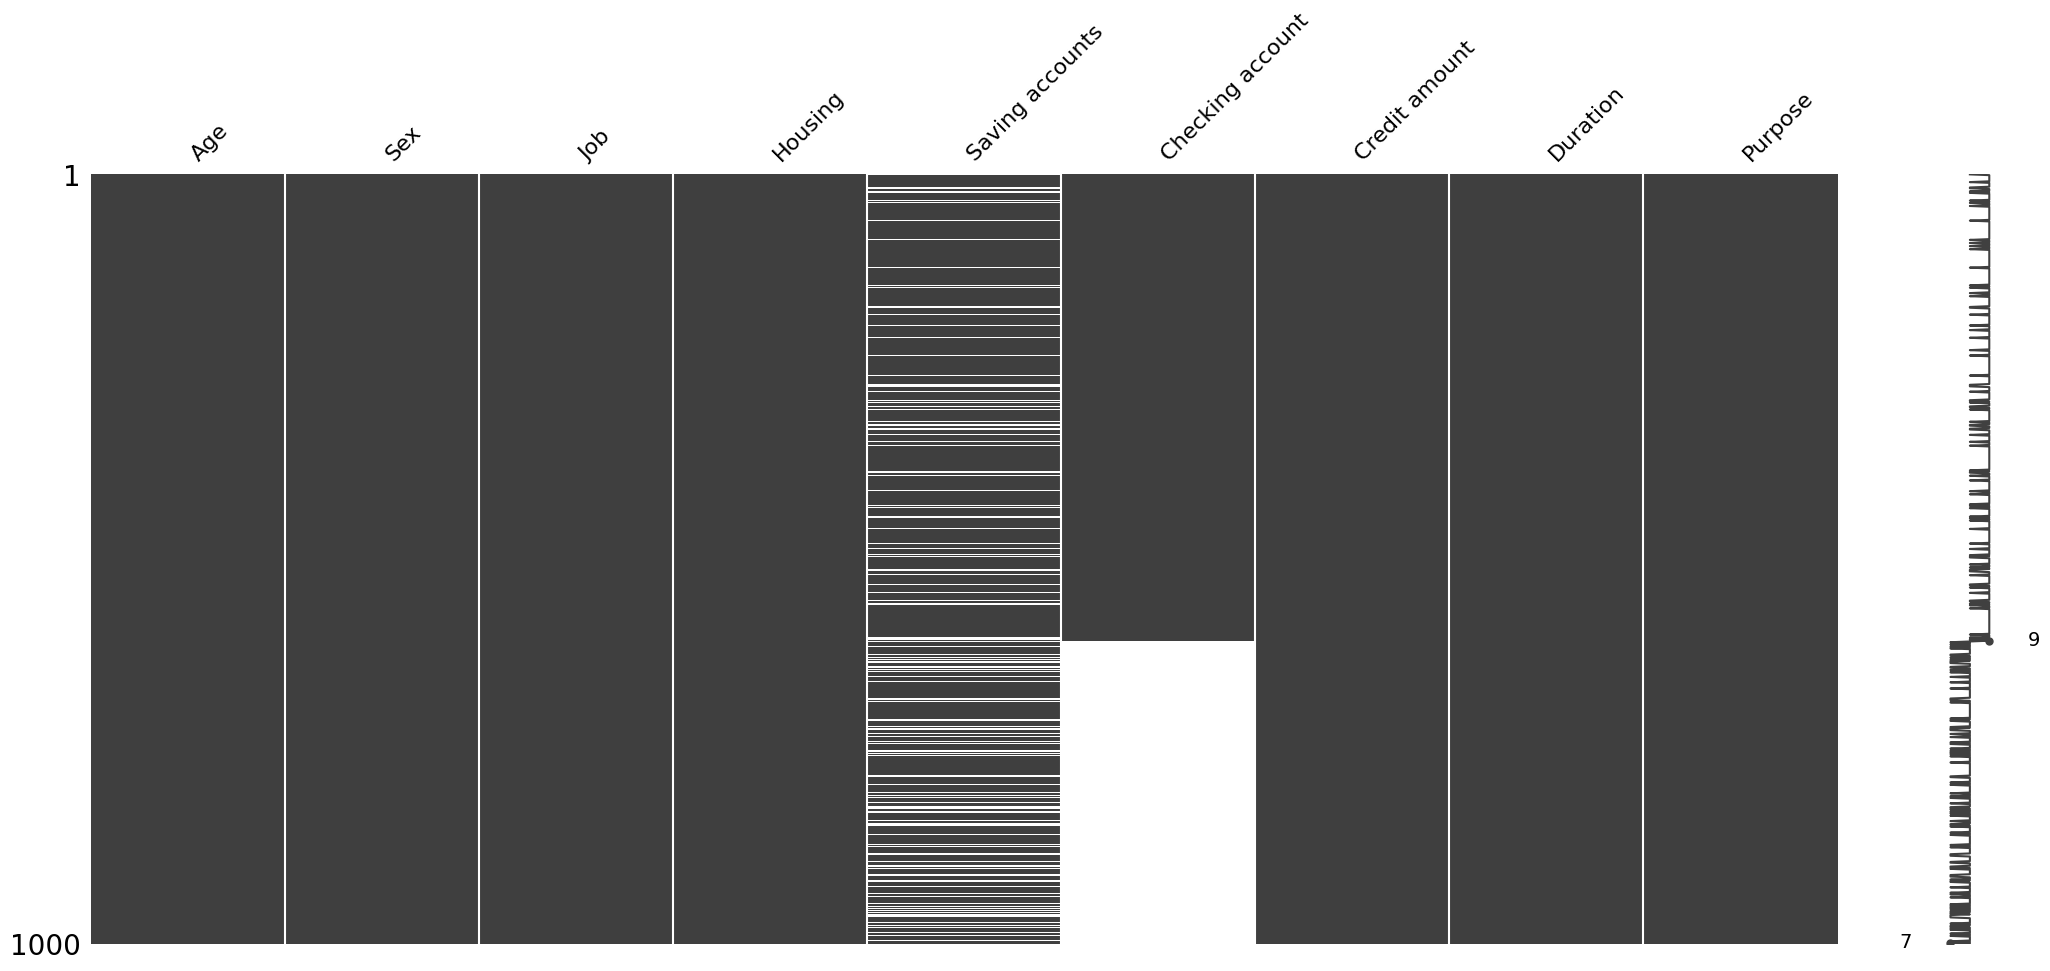

In [42]:
# Visualizing null values after sorting df by Checking account
msno.matrix(data.sort_values('Checking account'))

* As feature 'Checking account' does not follow any relationship with the feature 'Saving accounts'. Hence they follow MCAR mechanism.

#**CATEGORICAL DATA ENCODING**

In [43]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [44]:
# converting sex column to binary column using get_dummies.
gender = pd.get_dummies(data['Sex'], prefix='Sex', drop_first=True)
gender.head()

#Dropping sex column after encoding.
data = data.drop('Sex', axis=1)

In [45]:
# Converting categorical columns to numeric using map encoding.
data['Housing'] = data.Housing.map({'own': 0, 'rent':1, 'free':2})

data['Saving accounts'] = data['Saving accounts'].map({'little': 0, 'moderate':1,
                                                   'rich':2, 'quite rich':3})

data['Checking account'] = data['Checking account'].map({'little': 0, 'moderate':1,
                                                   'rich':2})

##**HANDLING MISSING VALUES**

In [46]:
# Separating features and target.
features = data.drop('Purpose',axis=1)
target = data['Purpose']

In [47]:
# Concatenating gender with the features dataframe.
features = pd.concat([features, gender], axis = 1)
features.head()

,Age,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Sex_male
0,67,2,0,NaN,0.0,1169,6,1
1,22,2,0,0.0,1.0,5951,48,0
2,49,1,0,0.0,NaN,2096,12,1
3,45,2,2,0.0,0.0,7882,42,1
4,53,2,2,0.0,0.0,4870,24,1


In [48]:
# Taking a summary of dtypes of columns
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               1000 non-null   int64   
 1   Job               1000 non-null   category
 2   Housing           1000 non-null   int64   
 3   Saving accounts   817 non-null    float64 
 4   Checking account  606 non-null    float64 
 5   Credit amount     1000 non-null   int64   
 6   Duration          1000 non-null   int64   
 7   Sex_male          1000 non-null   uint8   
dtypes: category(1), float64(2), int64(4), uint8(1)
memory usage: 49.2 KB


In [49]:
# Applying KNN imputer to impute the missing values.
!pip install fancyimpute

from fancyimpute import KNN
KNN_imputer = KNN()
data_new = features.copy(deep=True)
data_new.iloc[:,:] = KNN_imputer.fit_transform(features)

Imputing row 1/1000 with 1 missing, elapsed time: 0.169
Imputing row 101/1000 with 1 missing, elapsed time: 0.172
Imputing row 201/1000 with 1 missing, elapsed time: 0.174
Imputing row 301/1000 with 1 missing, elapsed time: 0.176
Imputing row 401/1000 with 1 missing, elapsed time: 0.178
Imputing row 501/1000 with 0 missing, elapsed time: 0.181
Imputing row 601/1000 with 0 missing, elapsed time: 0.183
Imputing row 701/1000 with 1 missing, elapsed time: 0.185
Imputing row 801/1000 with 1 missing, elapsed time: 0.187
Imputing row 901/1000 with 0 missing, elapsed time: 0.190


<ipython-input-49-1c46af1e5375>:7: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



In [50]:
data_new.head()

,Age,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Sex_male
0,67.0,2.0,0.0,0.432752,0.000000,1169.0,6.0,1.0
1,22.0,2.0,0.0,0.000000,1.000000,5951.0,48.0,0.0
2,49.0,1.0,0.0,0.000000,1.509638,2096.0,12.0,1.0
3,45.0,2.0,2.0,0.000000,0.000000,7882.0,42.0,1.0
4,53.0,2.0,2.0,0.000000,0.000000,4870.0,24.0,1.0


In [51]:
# Concatenating the imputed dataframe with target for furthur analysis.
data = pd.concat([data_new, target],axis =1)

##Converting **Numerical** features to **Categorical** for furthur Analsis

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1000 non-null   float64
 1   Job               1000 non-null   float64
 2   Housing           1000 non-null   float64
 3   Saving accounts   1000 non-null   float64
 4   Checking account  1000 non-null   float64
 5   Credit amount     1000 non-null   float64
 6   Duration          1000 non-null   float64
 7   Sex_male          1000 non-null   float64
 8   Purpose           1000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 70.4+ KB


In [53]:
data.head(10)

,Age,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Sex_male,Purpose
0,67.0,2.0,0.0,0.432752,0.000000,1169.0,6.0,1.0,radio/TV
1,22.0,2.0,0.0,0.000000,1.000000,5951.0,48.0,0.0,radio/TV
2,49.0,1.0,0.0,0.000000,1.509638,2096.0,12.0,1.0,education
3,45.0,2.0,2.0,0.000000,0.000000,7882.0,42.0,1.0,furniture/equipment
4,53.0,2.0,2.0,0.000000,0.000000,4870.0,24.0,1.0,car
5,35.0,1.0,2.0,0.911156,0.925932,9055.0,36.0,1.0,education
6,53.0,2.0,0.0,3.000000,0.964432,2835.0,24.0,1.0,furniture/equipment
7,35.0,3.0,1.0,0.000000,1.000000,6948.0,36.0,1.0,car
8,61.0,1.0,0.0,2.000000,1.458235,3059.0,12.0,1.0,radio/TV
9,28.0,3.0,0.0,0.000000,1.000000,5234.0,30.0,1.0,car


In [54]:
# Converting numerical data to categorical using map.
data['Sex'] = data['Sex_male'].map({0:'female', 1:'male'})
data = data.drop('Sex_male', axis =1)
data['Job'] = data['Job'].map({0:'Unskilled_NR', 1:'Unskilled_R', 2:'Skilled', 3:'Highly skilled'})
data['Housing'] = data.Housing.map({0:'own', 1:'rent', 2:'free'})
data.head()

,Age,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Sex
0,67.0,Skilled,own,0.432752,0.000000,1169.0,6.0,radio/TV,male
1,22.0,Skilled,own,0.000000,1.000000,5951.0,48.0,radio/TV,female
2,49.0,Unskilled_R,own,0.000000,1.509638,2096.0,12.0,education,male
3,45.0,Skilled,free,0.000000,0.000000,7882.0,42.0,furniture/equipment,male
4,53.0,Skilled,free,0.000000,0.000000,4870.0,24.0,car,male


In [55]:
# Due to probabilities value in the above dataframe . we are using the below approach.
def SavAcc(x):
    if x < 0.5:
        return 'little'
    elif x < 1.5:
        return 'moderate'
    elif x < 2.5:
        return 'rich'
    else:
        return 'Quite rich'

data['Saving accounts'] = data['Saving accounts'].apply(SavAcc)

In [56]:
# Function to convert Checking account to categorical.
def ChecAcc(x):
    if x < 0.5:
        return 'little'
    elif x < 1.5:
        return 'moderate'
    else:
        return 'rich'


data['Checking account'] = data['Checking account'].apply(ChecAcc)
data.head()

,Age,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Sex
0,67.0,Skilled,own,little,little,1169.0,6.0,radio/TV,male
1,22.0,Skilled,own,little,moderate,5951.0,48.0,radio/TV,female
2,49.0,Unskilled_R,own,little,rich,2096.0,12.0,education,male
3,45.0,Skilled,free,little,little,7882.0,42.0,furniture/equipment,male
4,53.0,Skilled,free,little,little,4870.0,24.0,car,male


##**CREATING AGE GROUPS BASED ON CONTINUOUS AGE COLUMN**

In [57]:
# Here we are converting Age column into discrete column by applying binning.
data['Age_group'] = pd.cut(data['Age'], bins = [18,25,45,60, float('inf')], labels = ['Young adult', 'Adult', 'Senior', 'Elder'])

In [58]:
data.head()

,Age,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Sex,Age_group
0,67.0,Skilled,own,little,little,1169.0,6.0,radio/TV,male,Elder
1,22.0,Skilled,own,little,moderate,5951.0,48.0,radio/TV,female,Young adult
2,49.0,Unskilled_R,own,little,rich,2096.0,12.0,education,male,Senior
3,45.0,Skilled,free,little,little,7882.0,42.0,furniture/equipment,male,Adult
4,53.0,Skilled,free,little,little,4870.0,24.0,car,male,Senior


* Age groups are like:  18-25 : Young adult
                        26-45 : Adult
                        46-60 : Senior
                        60-above :Elder


In [59]:
# Plotting Age group vs Credit amount.
fig = px.box(data, x = 'Age_group', y = 'Credit amount', notched=True, width=1000, height=600)
fig.show()

* The younger age group tended to ask slightly for higher loans compared to the older age groups.

* Interesting enough these are the groups that are most likely to be unemployed or working part-time, since the youngest group either don't have the experience to have a job or they are studying in a university so they don't have enough time to work in a full-time job.

* In the elderly group side, this is the group that are most likely receiving their money from their pensions, meaning the elderly group is most likely unemployed or working part-time.

In [60]:
# Credit Amount distribution by Age groups (Housing wise)
fig = px.box(data, x = 'Age_group', y = 'Credit amount', color = 'Housing', notched=True, width=1000, height=600)
fig.show()

* Senior and adult group who live free applied for higher credit amount.
* People of all the groups who live in rent applied for lower credit amount.

In [61]:
# Credit amount vs Saving accounts (Age_group wise)
fig = px.box(data, x = 'Saving accounts', y = 'Credit amount', color = 'Age_group', notched=True, width=1000, height=600)
fig.show()

In [62]:
# Credit amount vs Checking accounts (Age_group wise)

fig = px.box(data, x = 'Checking account', y = 'Credit amount', color = 'Age_group', notched=True, width=1000, height=600)
fig.show()

In [63]:
# Duration vs Checking accounts (Age_group wise)
fig = px.box(data, x = 'Checking account', y = 'Duration', color = 'Age_group', notched=True, width=1000, height=600)
fig.show()

* We see that highly skilled and skilled workers took longer duration credit from banks. In age we don't see much of a difference as all job classes were between 30-40.

* From the previous plot and this plot we understand that the banks gave higher credit amount for more duration to highly skilled workers. But skilled workers who applied for more no. of applications got lower credit amount.

* People with free housing applied for larger amount of credit. This is clear that someone who can't afford his own house must take credit from the bank to survive.

##**Highly skilled men (below 35 years) who are staying in their own house.**

In [64]:
total_men = data[(data['Sex'] == 'male') & (data['Job'] == 'Highly skilled') & (data['Age']<35) & (data['Housing']=='own')]

In [65]:
# Highly skilled men below 35 years, who are staying in their own houses
len(total_men)

28

* There are 28 highly skilled men (below 35 years) are staying in their own house.

##Visualize males and females separately for their social status.

In [66]:
data.head()

,Age,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Sex,Age_group
0,67.0,Skilled,own,little,little,1169.0,6.0,radio/TV,male,Elder
1,22.0,Skilled,own,little,moderate,5951.0,48.0,radio/TV,female,Young adult
2,49.0,Unskilled_R,own,little,rich,2096.0,12.0,education,male,Senior
3,45.0,Skilled,free,little,little,7882.0,42.0,furniture/equipment,male,Adult
4,53.0,Skilled,free,little,little,4870.0,24.0,car,male,Senior


In [67]:
# Grouping the data based on 'JOB', 'SEX' and 'HOUSING'
Grouped_data = data.groupby(['Job', 'Sex','Housing'])

In [68]:
# Calculating mean age of the grouped data
Grouped_mean_age = Grouped_data['Age'].mean()
Grouped_mean_age

Job             Sex     Housing
Highly skilled  female  free       51.125000
                        own        35.761905
                        rent       36.125000
                male    free       44.240000
                        own        38.232877
                        rent       33.076923
Skilled         female  free       42.166667
                        own        31.842520
                        rent       27.203125
                male    free       41.859649
                        own        35.458462
                        rent       32.000000
Unskilled_NR    female  free       55.000000
                        own        39.833333
                        rent       25.000000
                male    free       58.000000
                        own        41.285714
Unskilled_R     female  free       49.250000
                        own        37.261905
                        rent       27.833333
                male    free       38.000000
                       

In [69]:
# Taking a view of average age of Highly skilled applicants.
highly_skilled_data = Grouped_mean_age.loc['Highly skilled']
highly_skilled_data

Sex     Housing
female  free       51.125000
        own        35.761905
        rent       36.125000
male    free       44.240000
        own        38.232877
        rent       33.076923
Name: Age, dtype: float64

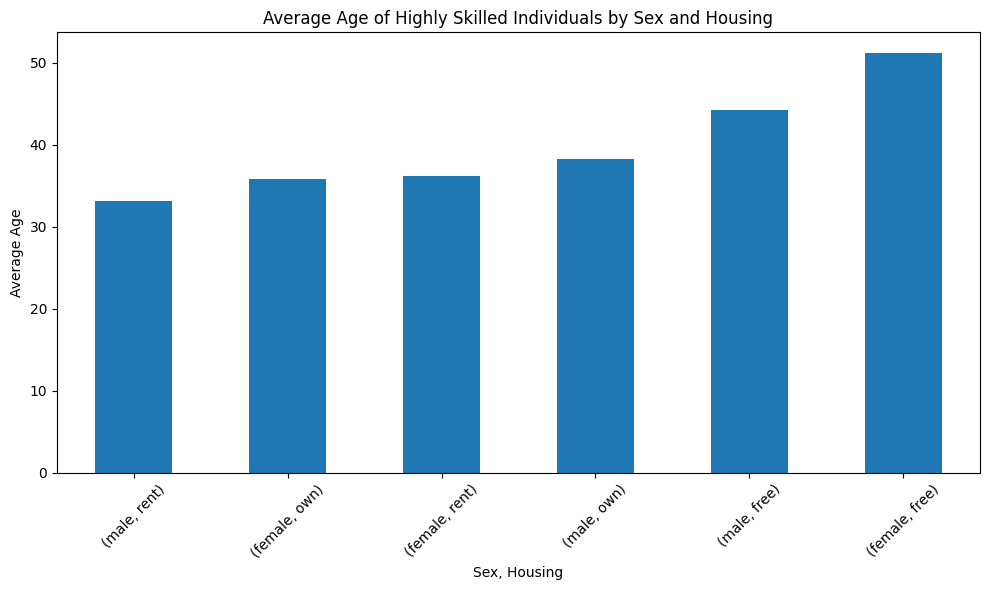

In [70]:
# Plotting Average age of highly skilled Individuals by Sex and Housing.
plt.figure(figsize=(10, 6))
highly_skilled_data.sort_values().plot(kind="bar")
plt.title("Average Age of Highly Skilled Individuals by Sex and Housing")
plt.xlabel("Sex, Housing")
plt.ylabel("Average Age")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [71]:
# Average age of skilled individuals.
skilled_data = Grouped_mean_age.loc['Skilled']
skilled_data

Sex     Housing
female  free       42.166667
        own        31.842520
        rent       27.203125
male    free       41.859649
        own        35.458462
        rent       32.000000
Name: Age, dtype: float64

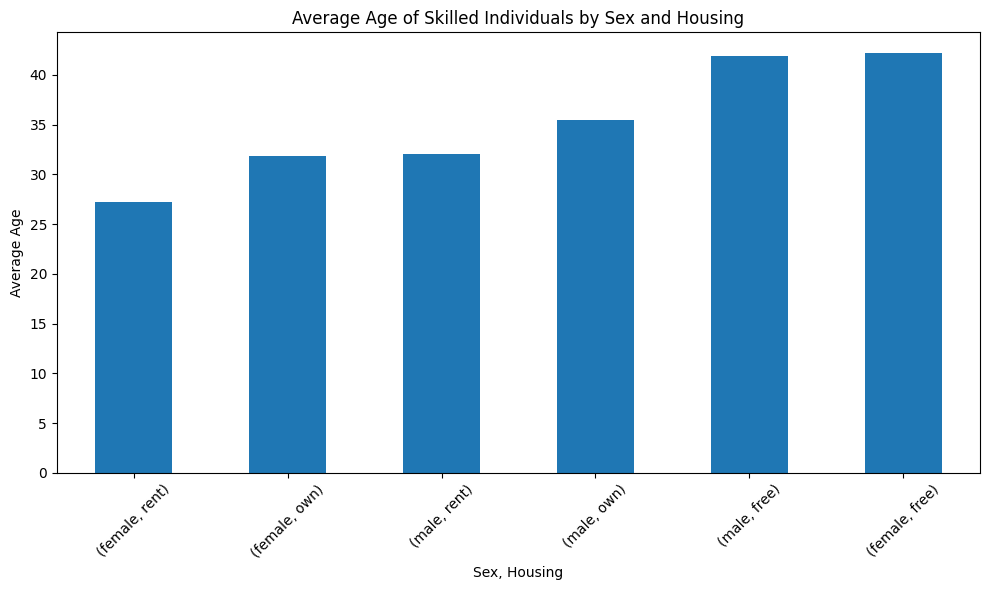

In [72]:
# Plotting Average age of skilled Individuals by Sex and housing.
plt.figure(figsize=(10, 6))
skilled_data.sort_values().plot(kind="bar")
plt.title("Average Age of Skilled Individuals by Sex and Housing")
plt.xlabel("Sex, Housing")
plt.ylabel("Average Age")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##OBSERVATIONS

* From the above graphs we can say that more no. of skilled and highly skilled male candidates took loan compared to skilled and highly skilled female candidates.

* More no. of male candidates who lived in their own houses applied for loan compared to female candidates who lived in their own houses.

* Female candidates who lived in rent houses applied for loan compared to male candidates, who are living in rent houses.

* The biggest applications for credit were for car. People who didn't have house where applying to get cars.

* The poor spent more on business, car and repairs, which are necessities

* The middle class spent the most on education.

* The rich and the quite rich took credit for luxury items like car, furniture and TV

* Females took credit for non essential items and vacations than males.